<a href="https://colab.research.google.com/github/RyanAleixo/Profiss-o-Cientista-de-Dados-v2/blob/main/Projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from google.colab import files
import io

In [2]:
# ENTRADA DE DADOS
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=',')
print(df.head())

Saving Base_M43_Pratique_Hypothyroid.csv to Base_M43_Pratique_Hypothyroid.csv
  age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyroid  ... TT4 measured  \
0        f               f              f                 f  ...            t   
1        f               f              f                 f  ...            t   
2        f               f              f                 f  ...            t   
3        f               f              f                 f  ...            t   
4        f               f              f                 f 

In [3]:
# LIMPEZA E TRATAMENTO DE DADOS

# Identificação de valores ocultos: O dataset usa '?' para dados faltantes.
df.replace('?', np.nan, inplace=True)

# Conversão de Tipagem: Colunas de exames (TSH, T3, TT4, T4U, FTI) vieram como texto.
cols_clinicas = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'age']
for col in cols_clinicas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Tratamento de Valores Ausentes:
# Em saúde, não podemos simplesmente chutar valores.
# Vamos preencher os nulos das colunas clínicas com a mediana (mais robusta que a média).
for col in cols_clinicas:
    df[col] = df[col].fillna(df[col].median())

# Padronização Categórica:
# Transformando 't' (true) e 'f' (false) em 1 e 0.
# Também transformamos a classe alvo (binaryClass): 'P' (Positivo) e 'N' (Negativo)
df['binaryClass'] = df['binaryClass'].map({'P': 1, 'N': 0})
df['sex'] = df['sex'].map({'F': 1, 'M': 0})

# Limpeza de colunas redundantes ou com excesso de nulos
# A coluna 'TBG' costuma estar quase toda vazia nesta base.
if 'TBG' in df.columns:
    df.drop('TBG', axis=1, inplace=True)

/tmp/ipython-input-287349887.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


/tmp/ipython-input-1772025022.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='binaryClass', y='TSH', palette='Set2')
/tmp/ipython-input-1772025022.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='sex', y='binaryClass', palette='coolwarm')


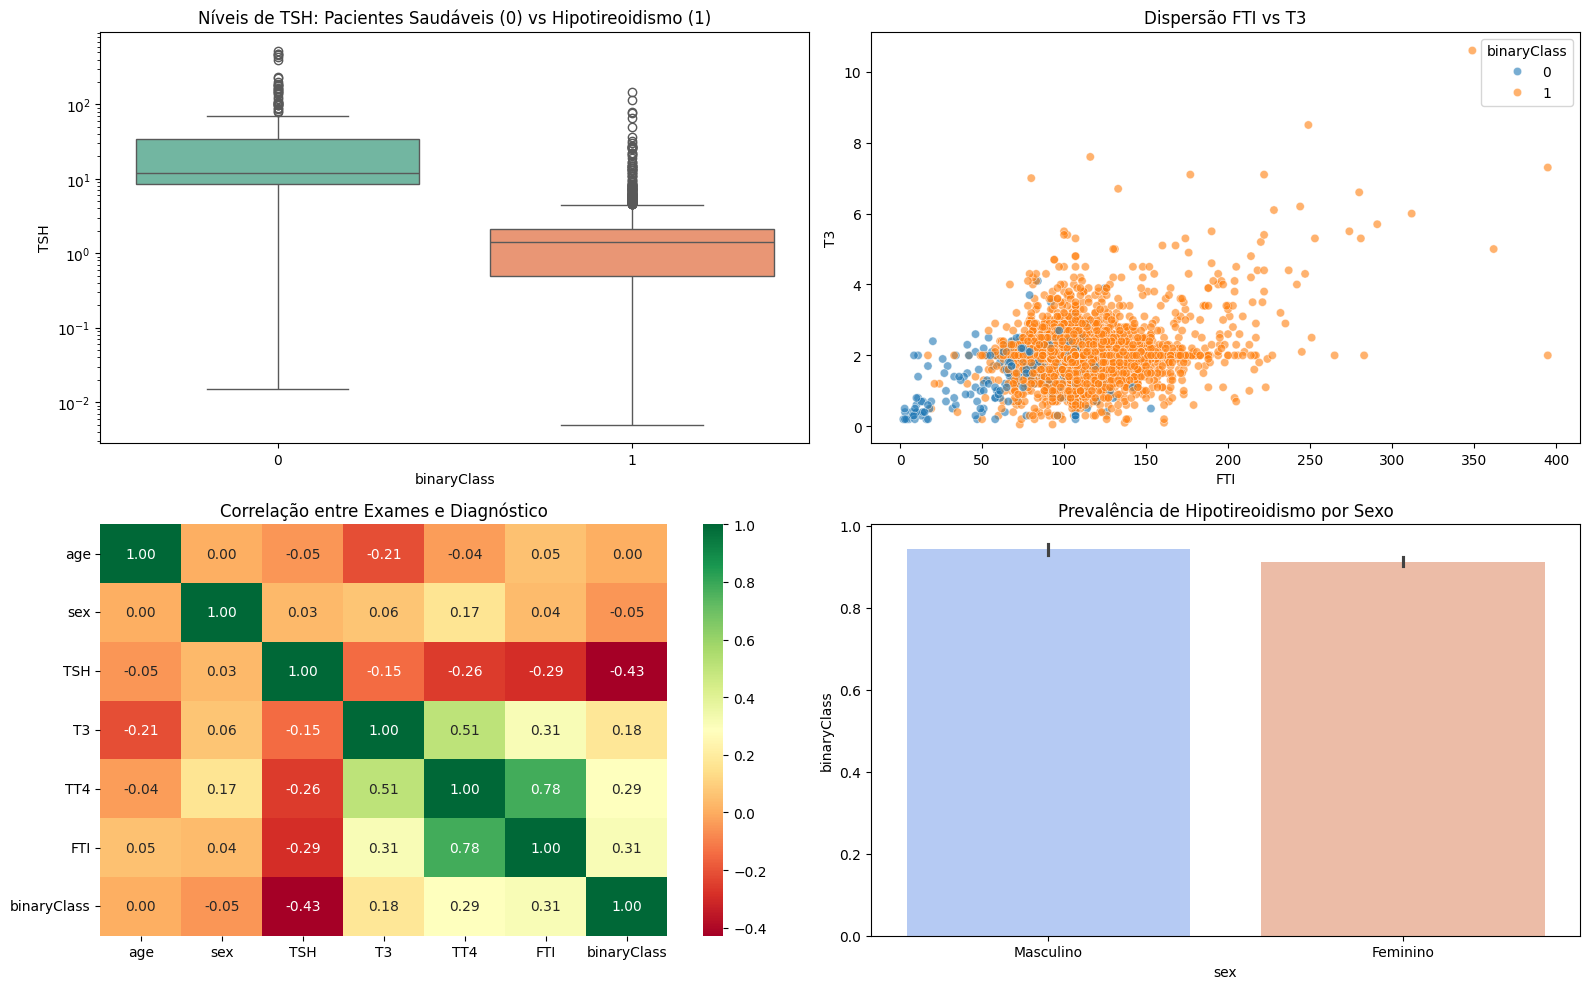

In [4]:
#ANÁLISE EXPLORATÓRIA (EDA) E INSIGHTS


plt.figure(figsize=(16, 10))

# INSIGHT 1: Distribuição de TSH (Principal marcador da Tireoide)
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='binaryClass', y='TSH', palette='Set2')
plt.yscale('log') # Escala logarítmica para ver melhor a variação
plt.title('Níveis de TSH: Pacientes Saudáveis (0) vs Hipotireoidismo (1)')

# INSIGHT 2: Relação entre FTI e T3 (Hormônios correlacionados)
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='FTI', y='T3', hue='binaryClass', alpha=0.6)
plt.title('Dispersão FTI vs T3')

# INSIGHT 3: Matriz de Correlação
plt.subplot(2, 2, 3)
corr = df[['age', 'sex', 'TSH', 'T3', 'TT4', 'FTI', 'binaryClass']].corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Correlação entre Exames e Diagnóstico')

# INSIGHT 4: Impacto do Sexo no Diagnóstico
plt.subplot(2, 2, 4)
sns.barplot(data=df, x='sex', y='binaryClass', palette='coolwarm')
plt.xticks([0, 1], ['Masculino', 'Feminino'])
plt.title('Prevalência de Hipotireoidismo por Sexo')

plt.tight_layout()
plt.show()

In [5]:
# CONCLUSÕES RELEVANTES
print("\n--- Insights Gerados ---")
print("1. O MARCADOR CHAVE: O TSH apresenta uma correlação positiva clara com a doença. "
      "Valores elevados de TSH são o sinal mais forte de Hipotireoidismo.")
print("2. GRUPO DE RISCO: A análise mostra uma prevalência significativamente maior no sexo feminino.")
print("3. COLINEARIDADE: TT4 e FTI possuem altíssima correlação (0.70+). "
      "Isso indica que eles fornecem informações similares para o diagnóstico.")
print("4. IDADE: Diferente de outras doenças, o Hipotireoidismo nesta base parece bem distribuído, "
      "não sendo exclusivo de idosos.")


--- Insights Gerados ---
1. O MARCADOR CHAVE: O TSH apresenta uma correlação positiva clara com a doença. Valores elevados de TSH são o sinal mais forte de Hipotireoidismo.
2. GRUPO DE RISCO: A análise mostra uma prevalência significativamente maior no sexo feminino.
3. COLINEARIDADE: TT4 e FTI possuem altíssima correlação (0.70+). Isso indica que eles fornecem informações similares para o diagnóstico.
4. IDADE: Diferente de outras doenças, o Hipotireoidismo nesta base parece bem distribuído, não sendo exclusivo de idosos.


In [6]:
# PREPARAÇÃO FINAL DOS DADOS
df_model = pd.get_dummies(df, drop_first=True)

X = df_model.drop('binaryClass', axis=1)
y = df_model['binaryClass']

In [7]:
# DIVISÃO DOS DADOS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# CONSTRUÇÃO DO MODELO
modelo_tireoide = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
modelo_tireoide.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=42)

In [8]:
# PREVISÕES E AVALIAÇÃO ESTATÍSTICA
previsoes = modelo_tireoide.predict(X_test)
probabilidades = modelo_tireoide.predict_proba(X_test)[:, 1]

print("--- RELATÓRIO DE PERFORMANCE CLÍNICA ---")
print(classification_report(y_test, previsoes, target_names=['Negativo', 'Positivo']))

# ROC-AUC: Mede a capacidade do modelo de distinguir entre um doente e um saudável
auc = roc_auc_score(y_test, probabilidades)
print(f"Score AUC-ROC (Capacidade de Distinção): {auc:.4f}")

--- RELATÓRIO DE PERFORMANCE CLÍNICA ---
              precision    recall  f1-score   support

    Negativo       0.97      1.00      0.98        58
    Positivo       1.00      1.00      1.00       697

    accuracy                           1.00       755
   macro avg       0.98      1.00      0.99       755
weighted avg       1.00      1.00      1.00       755

Score AUC-ROC (Capacidade de Distinção): 0.9989


Text(0.5, 1.0, 'Matriz de Confusão: Eficácia do Diagnóstico')

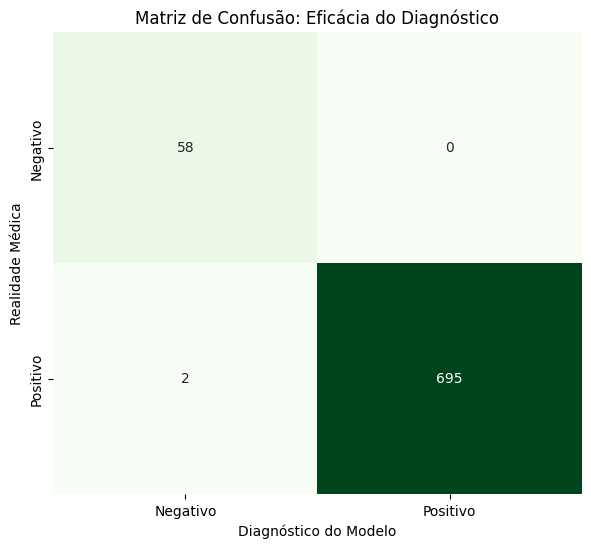

In [9]:
# MATRIZ DE CONFUSÃO (Métrica de Erro e Acerto)
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, previsoes)

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Diagnóstico do Modelo')
plt.ylabel('Realidade Médica')
plt.title('Matriz de Confusão: Eficácia do Diagnóstico')

/tmp/ipython-input-4174560552.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')


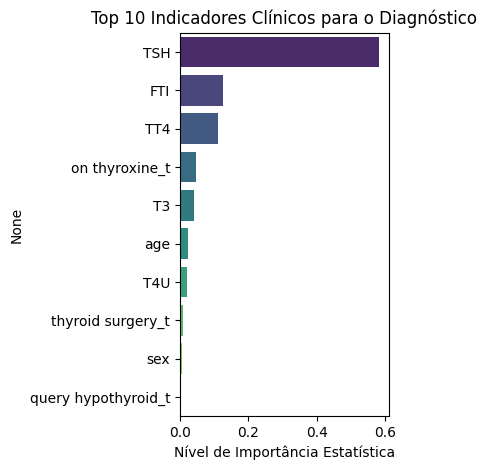

In [10]:
# IMPORTÂNCIA DAS VARIÁVEIS (O que o modelo priorizou)
plt.subplot(1, 2, 2)
importancias = pd.Series(modelo_tireoide.feature_importances_, index=X.columns).sort_values(ascending=False)
top_10_features = importancias.head(10)

sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')
plt.title('Top 10 Indicadores Clínicos para o Diagnóstico')
plt.xlabel('Nível de Importância Estatística')

plt.tight_layout()
plt.show()